<a href="https://colab.research.google.com/github/benmisago/BostonConsultingGroupChatbot/blob/main/%5BMisago%5D_Youtube_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['Transcript ', 'transcript_cleaned'], dtype='object')


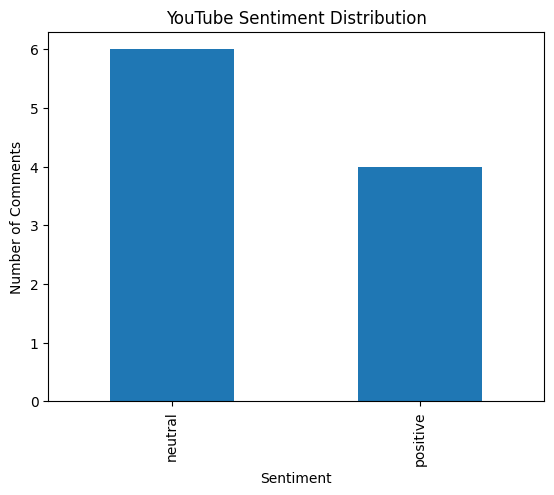

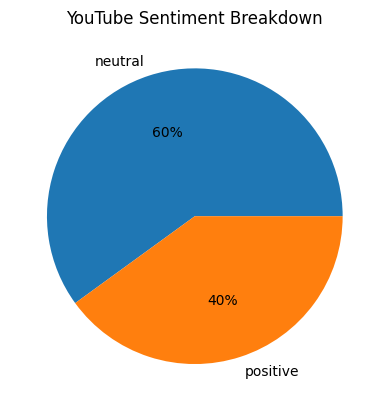

Columns in dataset: Index(['Transcript ', 'transcript_cleaned', 'sentiment_polarity',
       'sentiment_subjectivity', 'sentiment_label'],
      dtype='object')

Sample sentiment labels:
                                   transcript_cleaned  sentiment_polarity  \
0  working amazon weight youre going lose amazon ...            0.000000   
1  8 hours shift finished 8 hour shift im heading...            0.080952   
2  working amazon fulfillment center really reall...            0.056667   
3  amazon place cool make money sleepshot gone im...           -0.025000   
4  job like hiit workout 10 hours looks simple th...            0.250000   

   sentiment_subjectivity sentiment_label  
0                0.000000         neutral  
1                0.655952         neutral  
2                0.218571         neutral  
3                0.675000         neutral  
4                0.428571        positive  


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

youtube_df = pd.read_csv("/content/drive/MyDrive/Amazon Externship/youtube_cleaned_text (4).csv")


print(youtube_df.columns)



youtube_df['sentiment_polarity'] = youtube_df['transcript_cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
youtube_df['sentiment_subjectivity'] = youtube_df['transcript_cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)


def label_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

youtube_df['sentiment_label'] = youtube_df['sentiment_polarity'].apply(label_sentiment)

youtube_df['sentiment_label'].value_counts().plot(
    kind='bar',
    title="YouTube Sentiment Distribution"
)
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()


youtube_df['sentiment_label'].value_counts().plot(
    kind='pie',
    autopct='%1.0f%%',
    title="YouTube Sentiment Breakdown"
)
plt.ylabel('')
plt.show()


youtube_df.to_csv('youtube_sentiment.csv', index=False)


print("Columns in dataset:", youtube_df.columns)
print("\nSample sentiment labels:\n", youtube_df[['transcript_cleaned','sentiment_polarity','sentiment_subjectivity','sentiment_label']].head())
